<a href="https://colab.research.google.com/github/Dimka322/susu/blob/master/%D0%9F%D0%BE%D0%B8%D1%81%D0%BA_%D1%87%D0%B0%D1%81%D1%82%D1%8B%D1%85_%D0%BD%D0%B0%D0%B1%D0%BE%D1%80%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5976 sha256=c2ecaf83d88a9601447418110c1bad4a99de701b86ab7d62a57e287e0bfe6124
  Stored in directory: /root/.cache/pip/wheels/32/2a/54/10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


In [3]:
!unzip '/content/archive (6).zip' -d 'market'

Archive:  /content/archive (6).zip
  inflating: market/Market_Basket_Optimisation.csv  


In [25]:
import numpy as np
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt
import time

In [34]:
def create_dataset(path:str) -> pd.DataFrame:

  df = pd.read_csv(path)
  
  return df

## Retail

In [35]:
dataset = create_dataset('/content/retail.csv')
dataset.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
dataset.shape

(7500, 20)

In [12]:
transactions = [[str(dataset.values[i, j]) for j in range(dataset.shape[1])] for i in range(dataset.shape[0])]

In [13]:
len(transactions)

7500

In [14]:
transactions[0] # первая строка в dataset

['burgers',
 'meatballs',
 'eggs',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

In [17]:
rules = apriori(transactions=transactions, min_support=0.001, min_confidence=0.2, min_lift=3, min_length=2, max_length=2)

In [18]:
# rules
result = list(rules)

In [19]:
result[:5]

[RelationRecord(items=frozenset({'turkey', 'barbecue sauce'}), support=0.002533333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'barbecue sauce'}), items_add=frozenset({'turkey'}), confidence=0.2345679012345679, lift=3.7510858406380794)]),
 RelationRecord(items=frozenset({'chicken', 'burger sauce'}), support=0.0016, ordered_statistics=[OrderedStatistic(items_base=frozenset({'burger sauce'}), items_add=frozenset({'chicken'}), confidence=0.27272727272727276, lift=4.545454545454546)]),
 RelationRecord(items=frozenset({'chicken', 'extra dark chocolate'}), support=0.0028, ordered_statistics=[OrderedStatistic(items_base=frozenset({'extra dark chocolate'}), items_add=frozenset({'chicken'}), confidence=0.23333333333333334, lift=3.8888888888888893)]),
 RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004533333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.290598290

In [20]:
def inspect(results):
    lhs         =       [tuple(result[2][0][0])[0] for result in results]
    rhs         =       [tuple(result[2][0][1])[0] for result in results]
    supports    =       [result[1] for result in results]
    confidences =       [result[2][0][2] for result in results]
    lifts        =      [result[2][0][3] for result in results]
    return list (zip(lhs, rhs, supports, confidences, lifts))

In [51]:
df_results = pd.DataFrame(inspect(result), columns = ["Antecedent", "Consequent", "Support", "Confidence", "Lift"])

In [52]:
df_results

,Antecedent,Consequent,Support,Confidence,Lift
0,barbecue sauce,turkey,0.002533,0.234568,3.751086
1,burger sauce,chicken,0.001600,0.272727,4.545455
2,extra dark chocolate,chicken,0.002800,0.233333,3.888889
3,light cream,chicken,0.004533,0.290598,4.843305
4,chocolate bread,red wine,0.001067,0.250000,8.886256
5,shallot,cookies,0.002000,0.258621,3.216675
6,toothpaste,cooking oil,0.001867,0.229508,4.494286
7,corn,tomatoes,0.001067,0.222222,3.248863
8,dessert wine,salmon,0.001067,0.242424,5.717553
9,mushroom cream sauce,escalope,0.005733,0.300699,3.790327


In [23]:
df_results.nlargest(n = 10, columns = "Lift")

,Left hand side,Right hand side,Support,Confidence,Lift
19,hand protein bar,protein bar,0.001200,0.230769,12.451577
4,chocolate bread,red wine,0.001067,0.250000,8.886256
27,pet food,red wine,0.001600,0.244898,8.704904
21,sparkling water,hot dogs,0.001600,0.255319,7.880221
8,dessert wine,salmon,0.001067,0.242424,5.717553
13,fromage blanc,honey,0.003333,0.245098,5.178128
3,light cream,chicken,0.004533,0.290598,4.843305
10,pasta,escalope,0.005867,0.372881,4.700185
1,burger sauce,chicken,0.001600,0.272727,4.545455
26,pasta,shrimp,0.005067,0.322034,4.514494


In [24]:
df_results.nlargest(n = 10, columns = "Confidence")

,Left hand side,Right hand side,Support,Confidence,Lift
18,tomato sauce,ground beef,0.005333,0.377358,3.840147
10,pasta,escalope,0.005867,0.372881,4.700185
22,ketchup,pancakes,0.001600,0.363636,3.825067
15,tea,frozen vegetables,0.001333,0.344828,3.617073
17,herb & pepper,ground beef,0.016000,0.323450,3.291555
26,pasta,shrimp,0.005067,0.322034,4.514494
16,gluten free bar,pancakes,0.002133,0.307692,3.236595
9,mushroom cream sauce,escalope,0.005733,0.300699,3.790327
3,light cream,chicken,0.004533,0.290598,4.843305
1,burger sauce,chicken,0.001600,0.272727,4.545455


Набор частый, если его support не меньше min support

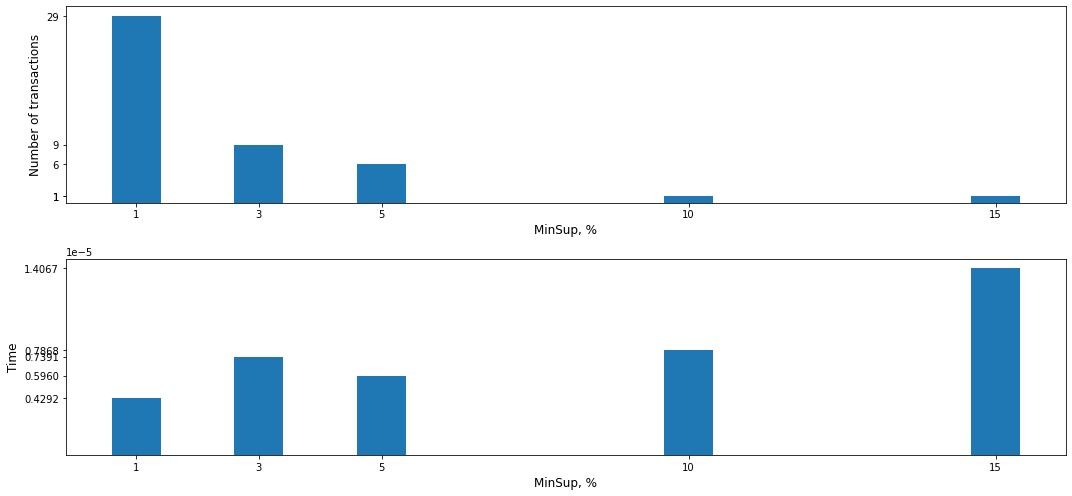

In [32]:
variants = [1, 3, 5, 10, 15]
lens = []
times = []
fig, ax = plt.subplots(2, 1, figsize=(15, 7))

for min_supp in variants:
  start_time = time.time()
  rules = apriori(transactions=transactions, min_support=min_supp*0.001, min_confidence=0.2, min_lift=3, min_length=2, max_length=2)
  end_time = time.time() - start_time
  lens.append(len(list(rules)))
  times.append(end_time)

ax[0].bar(variants, lens)
ax[1].bar(variants, times)
ax[0].set_xlabel('MinSup, %', fontsize=12)
ax[0].set_ylabel('Number of transactions', fontsize=12)
ax[0].set_xticks(variants)
ax[1].set_xticks(variants)
ax[0].set_yticks(lens)
ax[1].set_yticks(times)
ax[1].set_xlabel('MinSup, %', fontsize=12)
ax[1].set_ylabel('Time', fontsize=12)
plt.tight_layout()
plt.show()

## TV shows

In [36]:
dataset = create_dataset('/content/TV.csv')
dataset.head()

,Cobra Kai,Lupin,12 Monkeys,Sherlock,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,Lost,Jack Ryan,The Flash,Game of thrones,House of Cards,12 Monkeys,Vikings,Fringe,The Mentalist,The Alienist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sex Education,Dr. House,Kingdom,The Walking Dead,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ozark,Sex Education,Constantine,Preacher,Vikings,The Tick,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Naruto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sex Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
transactions = [[str(dataset.values[i, j]) for j in range(dataset.shape[1])] for i in range(dataset.shape[0])]

In [38]:
len(transactions), dataset.shape

(9689, (9689, 32))

In [39]:
transactions[0]

['Lost',
 'Jack Ryan',
 'The Flash',
 'Game of thrones',
 'House of Cards',
 '12 Monkeys',
 'Vikings',
 'Fringe',
 'The Mentalist',
 'The Alienist',
 'Big Little Lies',
 'Chernobyl',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

In [43]:
rules = apriori(transactions=transactions, min_support=0.001, min_confidence=0.2, min_lift=3, min_length=2, max_length=2)

In [44]:
results = list(rules)
len(results)

41

In [45]:
results[:5]

[RelationRecord(items=frozenset({'Game of thrones', '12 Monkeys'}), support=0.0038187635462896066, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Game of thrones'}), items_add=frozenset({'12 Monkeys'}), confidence=0.22023809523809523, lift=3.763468967834047)]),
 RelationRecord(items=frozenset({'Inside Job', '12 Monkeys'}), support=0.0012385179069047372, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Inside Job'}), items_add=frozenset({'12 Monkeys'}), confidence=0.24489795918367344, lift=4.1848612460857355)]),
 RelationRecord(items=frozenset({'24', 'Atypical'}), support=0.001857776860357106, ordered_statistics=[OrderedStatistic(items_base=frozenset({'24'}), items_add=frozenset({'Atypical'}), confidence=0.4285714285714286, lift=3.0622629582806575)]),
 RelationRecord(items=frozenset({'24', 'Preacher'}), support=0.0011353080813293426, ordered_statistics=[OrderedStatistic(items_base=frozenset({'24'}), items_add=frozenset({'Preacher'}), confidence=0.2619047619047619

In [50]:
df_results = pd.DataFrame(inspect(results), columns = ["Antecedent", "Consequent", "Support", "Confidence", "Lift"])
df_results

,Antecedent,Consequent,Support,Confidence,Lift
0,Game of thrones,12 Monkeys,0.003819,0.220238,3.763469
1,Inside Job,12 Monkeys,0.001239,0.244898,4.184861
2,24,Atypical,0.001858,0.428571,3.062263
3,24,Preacher,0.001135,0.261905,6.608321
4,Alice in Borderland,Daredevil,0.007121,0.287500,3.061085
5,Altered Carbon,Cobra Kai,0.001135,0.343750,4.142530
6,Prison Break,Archer,0.002580,0.252525,4.369138
7,The White Lotus,Archer,0.001239,0.203390,3.519007
8,Arrow,The Wire,0.005780,0.221344,3.366720
9,The Nevers,Berlin Station,0.001239,0.226415,4.077576


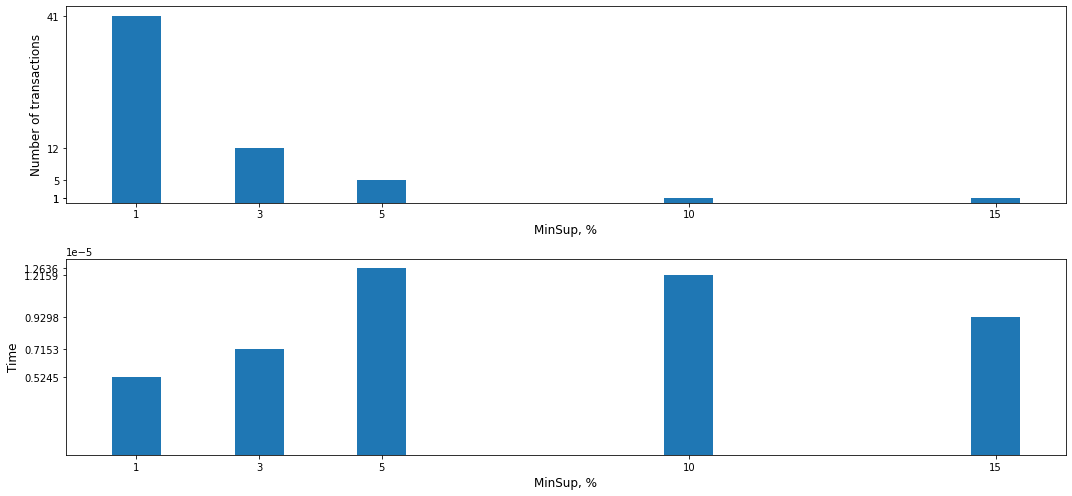

In [49]:
variants = [1, 3, 5, 10, 15]
lens = []
times = []
fig, ax = plt.subplots(2, 1, figsize=(15, 7))

for min_supp in variants:
  start_time = time.time()
  rules = apriori(transactions=transactions, min_support=min_supp*0.001, min_confidence=0.2, min_lift=3, min_length=2, max_length=2)
  end_time = time.time() - start_time
  lens.append(len(list(rules)))
  times.append(end_time)

ax[0].bar(variants, lens)
ax[1].bar(variants, times)
ax[0].set_xlabel('MinSup, %', fontsize=12)
ax[0].set_ylabel('Number of transactions', fontsize=12)
ax[0].set_xticks(variants)
ax[1].set_xticks(variants)
ax[0].set_yticks(lens)
ax[1].set_yticks(times)
ax[1].set_xlabel('MinSup, %', fontsize=12)
ax[1].set_ylabel('Time', fontsize=12)
plt.tight_layout()
plt.show()